###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [ ]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

In [ ]:
# import os
# os.listdir()
!pwd

/content


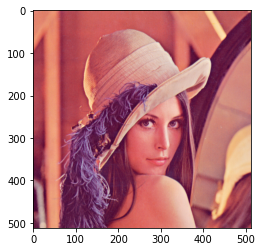

In [ ]:
image = plt.imread("lena.png") #matplotlib rescales the 8-bit data from each channel to floating-point data between 0.0 and 1.0.
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [ ]:
print(image.shape)

(512, 512, 3)


In [ ]:
# print(image)

###### Task1.2:  Visualization of each channel

In [ ]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    # b = image[:,:,0]
    # g = image[:,:,1]
    # r = image[:,:,2]
    #write your code here
    if channel == 0:
      output =image[:,:,0]
      plt.imshow(image[:,:,0])
    elif channel== 1:
      output =image[:,:,1]
      plt.imshow(image[:,:,1])
    elif channel== 2:
      output =image[:,:,2]
      plt.imshow(image[:,:,2])



    return output    # 'output' is image's particular channel values

array([[0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       [0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       [0.49019608, 0.49019608, 0.52156866, ..., 0.47843137, 0.43137255,
        0.3529412 ],
       ...,
       [0.23529412, 0.23529412, 0.22745098, ..., 0.32941177, 0.29803923,
        0.30980393],
       [0.22352941, 0.22352941, 0.24313726, ..., 0.30980393, 0.31764707,
        0.31764707],
       [0.22352941, 0.22352941, 0.24313726, ..., 0.30980393, 0.31764707,
        0.31764707]], dtype=float32)

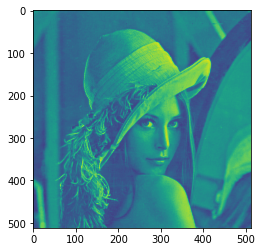

In [ ]:
VisualizeChannel(image,2)

# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

In [ ]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    # plt.imshow(gray,cmap='gray')
    return gray       #'gray' is grayscale image, converted from RGB image
RGB2Gray(image)

array([[0.63615847, 0.63615847, 0.6362185 , ..., 0.6648275 , 0.607478  ,
        0.5025608 ],
       [0.63615847, 0.63615847, 0.6362185 , ..., 0.6648275 , 0.607478  ,
        0.5025608 ],
       [0.63615847, 0.63615847, 0.6362185 , ..., 0.6648275 , 0.607478  ,
        0.5025608 ],
       ...,
       [0.16672002, 0.16672002, 0.19592078, ..., 0.40837926, 0.3921208 ,
        0.385511  ],
       [0.17224237, 0.17224237, 0.21390747, ..., 0.406271  , 0.41181138,
        0.42340592],
       [0.17224237, 0.17224237, 0.21390747, ..., 0.406271  , 0.41181138,
        0.42340592]], dtype=float32)

###### Task2.2 : Gray to Binary

In [ ]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        image=RGB2Gray(image)


    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg=image
    for i in range(0,image.shape[0]):
      for j in range (0,image.shape[1]):
        if image[i][j]>T: bimg[i][j]=0
        else : bimg[i][j]=1

    #write code to visualize the resultant image
    plt.imshow(bimg,cmap='gray')

    return bimg


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

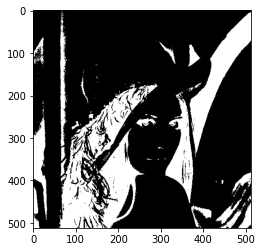

In [ ]:
Gray2Binary(image,0.35)

######  Task2.3:  Crop a 5*5 section of a gray image

In [ ]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5)
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        image=RGB2Gray(image)


    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
        patch=image[r0 : (r0+5),c0 : (c0+5)]

    # visualize patch and print its value
        plt.imshow(patch,cmap='gray')
        print(patch)


    return patch

[[0.616982   0.61114585 0.6236098  0.60230047 0.6192839 ]
 [0.61683726 0.6152604  0.61223334 0.60811883 0.614511  ]
 [0.61951965 0.6101428  0.61114585 0.6005545  0.61282516]
 [0.6041976  0.620378   0.6117196  0.6070134  0.6019623 ]
 [0.59331065 0.6211389  0.6141063  0.6135745  0.61114585]]
(5, 5) (512, 512, 3)


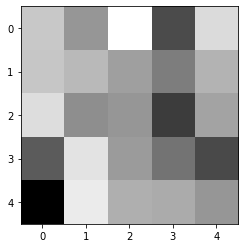

In [ ]:
patch = ImageCrop(image,10,10)
print(patch.shape,image.shape)
plt.imshow(patch,cmap="gray")

###### Task2.4: Uniform Brightness Scaling

In [ ]:
def UniformBrightScaling(orginal_image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    image=np.copy(orginal_image)
    if len(image.shape)==2:
      for i in range(0,image.shape[0]):
        for j in range (0,image.shape[1]):
          bright_factor=image[i][j]*scale
          if(bright_factor>1):bright_factor=1
          image[i][j]=bright_factor
    if len(image.shape)==3:
      for i in range(0,image.shape[0]):
        for j in range (0,image.shape[1]):
          for k in range(0,image.shape[2]):
            bright_factor=(image[i][j][k]*scale)
            if(bright_factor>1):bright_factor=1
            image[i][j][k]=bright_factor
    #display the resultant image


    return image        #replace output with the variable name you used for final result


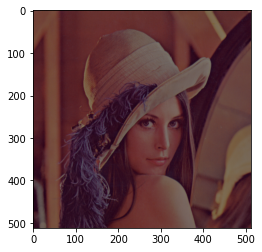

In [ ]:
scale=0.5
brighter_image=UniformBrightScaling(image,scale)
plt.imshow(brighter_image)

# 3. Image Filtering

In [ ]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here.
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convoluti on kernel
    '''
    # first convert RGB to gray if input is RGB image

    l = len(image.shape)

    if l == 3:
        #write code to convert it to gray scale
        gray=RGB2Gray(image)
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    r,c=gray.shape
    output=np.zeros((r,c))

    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    pad_img =np.zeros((r+2,c+2))

    #now copy gray image to above created array at location starting from (1,1)
    for i in range(1,r):
      for j in range(1,c):
        pad_img[i][j]=gray[i][j]

    #write code to convolve the image
    for row in range(1,r):     # use appropiate range values for row and col
        for col in range(1,c):

            # kernel=pad_img[(row-1):(row+2),(col-1):(col+2)]
            patch=pad_img[(row-1):(row+2),(col-1):(col+2)]
            # print(patch.shape)
            output[row-1,col-1]=(np.multiply(patch,kernel)).sum()
            # for kernel_row in kernel:
            #   for element in kernel_row:
            #     output=np.dot()

            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)



    return output

In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

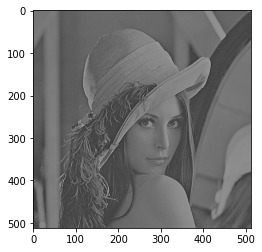

In [ ]:
kernel=np.matrix([[0,-1,0],[-1,5,-1],[0,-1,0]])
# kernel=np.full((3,3),(1/9))
# print(kernel)
plt.imshow(feature_extractor(image,kernel),cmap="gray")

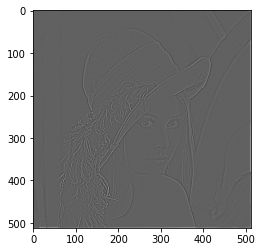

In [ ]:
kernel=np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plt.imshow(feature_extractor(image,kernel),cmap="gray")

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

# 5. Solution of a system of equation

###### Task5.1: Least square error

In [ ]:
def LeastSqSoln(A,b):
    '''
    Ax = b
    Convert the system of equations in form Ax = b
    '''
    # write your code here to find x'
    temp=np.dot(A.transpose(),A)
    p=np.dot(A.transpose(),b)
    xhat=np.dot(np.linalg.inv(temp),p)
    error=b-np.dot(A,xhat)
    # if the exect solution were (1,1), write code to find square error (L2 norm)



    return xhat, error

In [ ]:
LeastSqSoln(np.array([[1,0],[1,1],[1,2]]),np.array([6,0,0]))

(array([ 5., -3.]), array([ 1., -2.,  1.]))